## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words
import warnings
warnings.filterwarnings("ignore")

## IMPORTING DATASET

In [2]:
df=pd.read_excel('I:\Project - Data Science\dataset.xlsx')
df.head(20)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...
1,"Dear Professor name,\n\nMy name is name. I was...",NaN
2,"Dear name,\n\nI’m reaching out to request a le...",NaN
3,"Dear name,\n\nMy name is name. I volunteered a...",NaN
4,"Dear name,\n\nI am writing to you to request t...",NaN
5,"Dear Professor name,\n\nI have greatly enjoyed...",NaN
6,To whom it may concern:\n\nIt is my pleasure t...,NaN
7,"Dear Sir,\n\nI am sending herewith a team of t...",NaN
8,Dear name: \nname Applicant has worked directl...,NaN
9,"Dear name, \n1 am contacting you today in rega...",NaN


In [3]:
# count the number of rows in dataset
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES            34
dtype: int64

### Fills the null value with the previous value.

In [4]:
df.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...
1,"Dear Professor name,\n\nMy name is name. I was...",EMAIL RECOMMENDATION LETTER ...
2,"Dear name,\n\nI’m reaching out to request a le...",EMAIL RECOMMENDATION LETTER ...
3,"Dear name,\n\nMy name is name. I volunteered a...",EMAIL RECOMMENDATION LETTER ...
4,"Dear name,\n\nI am writing to you to request t...",EMAIL RECOMMENDATION LETTER ...
...,...,...
313,"Hotel Reservation Letter Sample\nNovember 23, ...",Hotel Booking Confirmation ...
314,PUBLIC\nCHICAGO\nWE LOOK\nFORWARD TO\nSEEING Y...,Hotel Booking Confirmation ...
315,"www.setupmyhotel.com\nHotel Name\nAddress,\nT ...",Hotel Booking Confirmation ...
316,"Hotel Riu Costa Lago - All Inclusive, Torremol...",Hotel Booking Confirmation ...


In [5]:
# count the number of rows in dataset after filling null values
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES           318
dtype: int64

#### DATASET DESCRIPTION

In [6]:
df.describe()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES
count,318,318
unique,310,34
top,"Hello name,\nI hope all is great with you. I w...",SENDING RESUME FOR JOB ...
freq,3,10


In [7]:
df1=df.head(10) # copy of first ten rows of dataset

In [8]:
# function that converts text into lower case and removes special characters

def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

## SAMPLE VISUALIZATION OF 1st 10 mails

In [9]:
step1(df1['CONTEXT_OF_SAMPLE_MAIL'])

dear name   it s my absolute pleasure to recommend name for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently name is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that joanne was a huge piece of our success   along with her undeniable talent  joanne has always been an absolute joy to work w

## CLEANING THE MAILS

In [10]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [11]:
df['CONTEXT_OF_SAMPLE_MAIL'] = df.CONTEXT_OF_SAMPLE_MAIL.apply(clean)
df.CONTEXT_OF_SAMPLE_MAIL

0      dear name\n\nits my absolute pleasure to recom...
1      dear professor name\n\nmy name is name i was y...
2      dear name\n\nim reaching out to request a lett...
3      dear name\n\nmy name is name i volunteered at ...
4      dear name\n\ni am writing to you to request th...
                             ...                        
313    hotel reservation letter sample\nnovember  \nt...
314    public\nchicago\nwe look\nforward to\nseeing y...
315    wwwsetupmyhotelcom\nhotel name\naddress\nt  f ...
316    hotel riu costa lago  all inclusive torremolin...
317    setup my hotel\nsample forms documents and dis...
Name: CONTEXT_OF_SAMPLE_MAIL, Length: 318, dtype: object

In [12]:
df.head()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...


In [13]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['CONTEXT_OF_SAMPLE_MAIL'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,to,1738
1,the,1462
2,you,1134
3,and,1109
4,of,821
...,...,...
4786,method,1
4787,ta,1
4788,thereafter,1
4789,medium,1


In [14]:
text = ' '.join(df['CONTEXT_OF_SAMPLE_MAIL'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 4832 samples and 42557 outcomes>


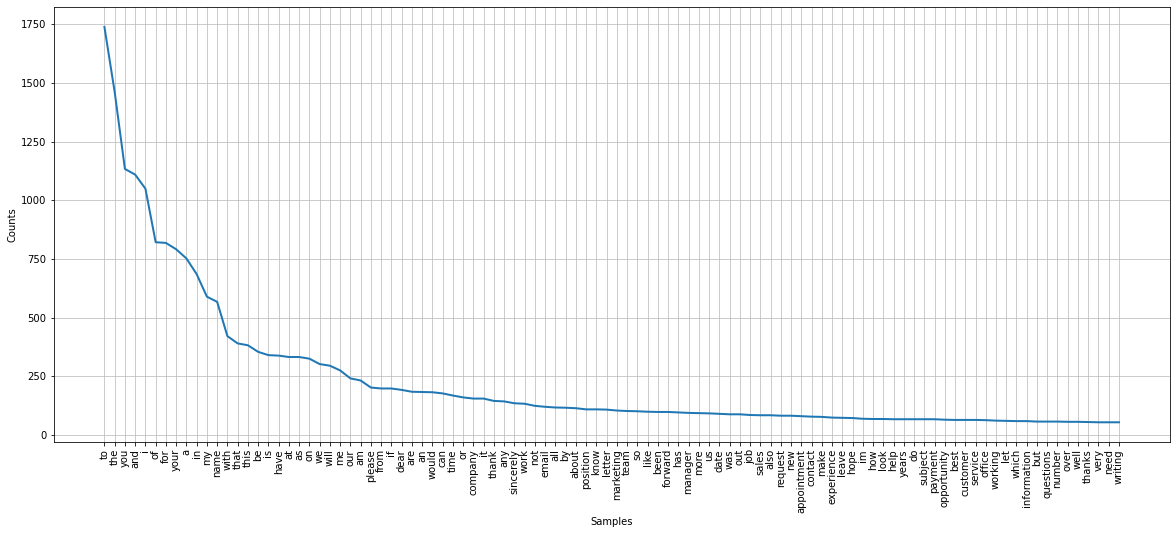

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

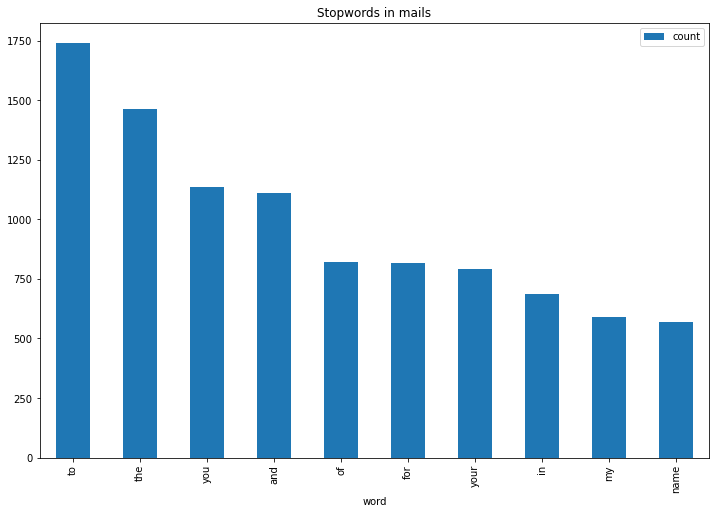

In [16]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')

## THERE ARE SO MANY STOPWORDS WE NEED TO REMOVE THAT

In [17]:
# all the stop words we have 
stop = stopwords.words('english')
new_words=('dear','name', 'work', 'email','please','sincerly','would','time','company','date','sincerely')
for i in new_words:
    stop.append(i)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## REMOVING STOPWORDS

In [18]:
df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'] = df['CONTEXT_OF_SAMPLE_MAIL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [19]:
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,CONTEXT_OF_SAMPLE_MAIL_without_stopwords
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,absolute pleasure recommend sales manager posi...
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,professor student business marketing fall seme...
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,im reaching request letter recommendation rega...
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,volunteered san francisco aspca elk dr supervi...
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,writing request provide reference begin job se...
...,...,...,...
313,hotel reservation letter sample\nnovember \nt...,Hotel Booking Confirmation ...,hotel reservation letter sample november hotel...
314,public\nchicago\nwe look\nforward to\nseeing y...,Hotel Booking Confirmation ...,public chicago look forward seeing mr mcguire ...
315,wwwsetupmyhotelcom\nhotel name\naddress\nt f ...,Hotel Booking Confirmation ...,wwwsetupmyhotelcom hotel address f e adminsetu...
316,hotel riu costa lago all inclusive torremolin...,Hotel Booking Confirmation ...,hotel riu costa lago inclusive torremolinos ma...


In [20]:
book = [x.strip() for x in df.CONTEXT_OF_SAMPLE_MAIL] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

# LEMMATIZATION TEXT

In [21]:
# function that performs text normalization steps

def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence 

In [22]:
text_normalization('dear arya smith   it s my absolute pleasure to recommend joanne adams for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently  joanne is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that joanne was a huge piece of our success   along with her undeniable talent  joanne has always been an absolute joy to work with  she is a true team player  and always fosters positive discussions and brings the best out of other employees   without a doubt  i confidently recommend joanne to join your team at the sales company  as a dedicated and knowledgeable employee and an all around great person  i know that she will be a beneficial addition to your organization   please feel free to contact me at 555 123 4567 if you want to discuss joanne s qualifications and experience further  i d be happy to expand on my recommendation   best wishes   kat boogaard director of sales generic sales company')

'dear arya smith it s my absolute pleasure to recommend joanne adam for the sale manager position with the sale company joanne and i work together at generic sale company where i be her manager and direct supervisor from to i thoroughly enjoy my time work with joanne and come to know her a a truly valuable asset to our team she be honest dependable and incredibly hardworking beyond that she be an impressive problem solver who be able to address complex issue strategically and confidently joanne be inspire by challenge and never intimidate by them her knowledge of sale etiquette and expertise in cold call be a huge advantage to our entire office not only do she put this skill set to work but she also lead a series of train session on cold call with the team increase our total sale by over in just one quarter i know that joanne be a huge piece of our success along with her undeniable talent joanne have always be an absolute joy to work with she be a true team player and always foster pos

In [23]:
df['lemmatized_text']=df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.tail(15)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,CONTEXT_OF_SAMPLE_MAIL_without_stopwords,lemmatized_text
303,hello \n\nit looks like your car is almost due...,Car Sales :Service Reminder ...,hello looks like car almost due maintenance he...,hello look like car almost due maintenance hel...
304,hello \n\nnobody likes the hassle of getting t...,Car Sales :Service Reminder ...,hello nobody likes hassle getting car serviced...,hello nobody like hassle get car service coupl...
305,service reminders outstanding recommendations...,Car Sales :Service Reminder ...,service reminders outstanding recommendations ...,service reminder outstanding recommendation su...
306,service customer intermediate service reminde...,Car Sales :Service Reminder ...,service customer intermediate service reminder...,service customer intermediate service reminder...
307,service customer we havent seen you\nsubject ...,Car Sales :Service Reminder ...,service customer havent seen subject customer ...,service customer havent see subject customer h...
308,\naddress sender\ndate june \nname recipient...,Hotel Booking Confirmation ...,address sender june recipient address recipien...,address sender june recipient address recipien...
309,dear \n\nthis email is to confirm your booking...,Hotel Booking Confirmation ...,confirm booking single room three nights break...,confirm book single room three night breakfast...
310,dear name\n\n thank you for choosing to st...,Hotel Booking Confirmation ...,thank choosing stay us sample hotel pleased co...,thank choose stay u sample hotel please confir...
311,reservation letter for hotel sample\nname inn\...,Hotel Booking Confirmation ...,reservation letter hotel sample inn big indian...,reservation letter hotel sample inn big indian...
312,from\nname\nmanager\nqueen marts hotel\n brand...,Hotel Booking Confirmation ...,manager queen marts hotel brandy court oakland...,manager queen mart hotel brandy court oakland ...


## COUNT OF WORDS AFTER LEMMATIZATION

In [24]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(df['lemmatized_text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

wf_df1

,word,count
0,appointmenti,1109
1,reverence,821
2,inclusion,818
3,mentee,685
4,recorrirriendaticn,589
...,...,...
3812,cruzado,1
3813,pico,1
3814,refund,1
3815,thereafter,1


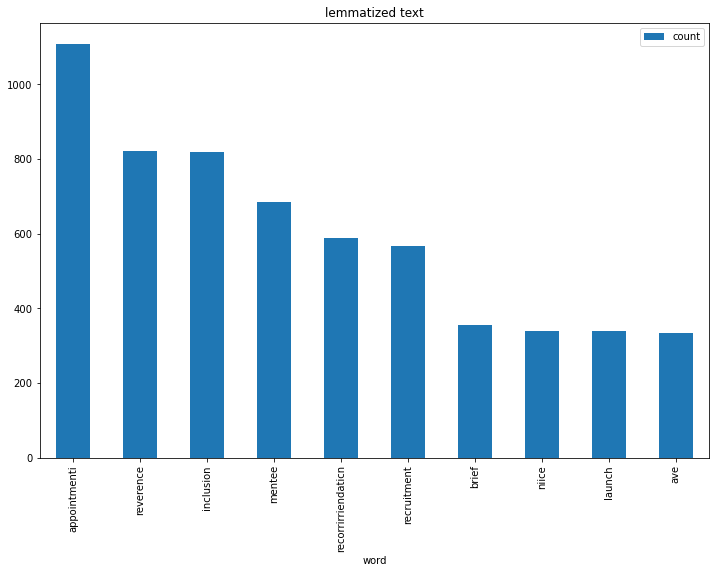

In [25]:
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='lemmatized text')

## FREQUENCY OF WORDS AFTER LEMMATIZATION

In [26]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['lemmatized_text']).split()).value_counts()[:50] # for top 20
freq_Sw

thank          158
position       122
make           122
look           119
know           118
letter         110
request        107
team           105
year           102
like           100
forward         98
manager         97
job             95
leave           94
help            92
u               92
experience      88
work            88
take            88
appointment     86
contact         85
sale            84
customer        84
also            84
new             83
write           82
service         82
marketing       82
opportunity     79
need            78
get             78
regard          74
day             73
hope            73
im              69
subject         68
payment         68
office          66
project         65
well            65
let             64
best            64
want            64
week            63
number          62
question        61
call            59
information     59
offer           57
reach           57
dtype: int64

In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

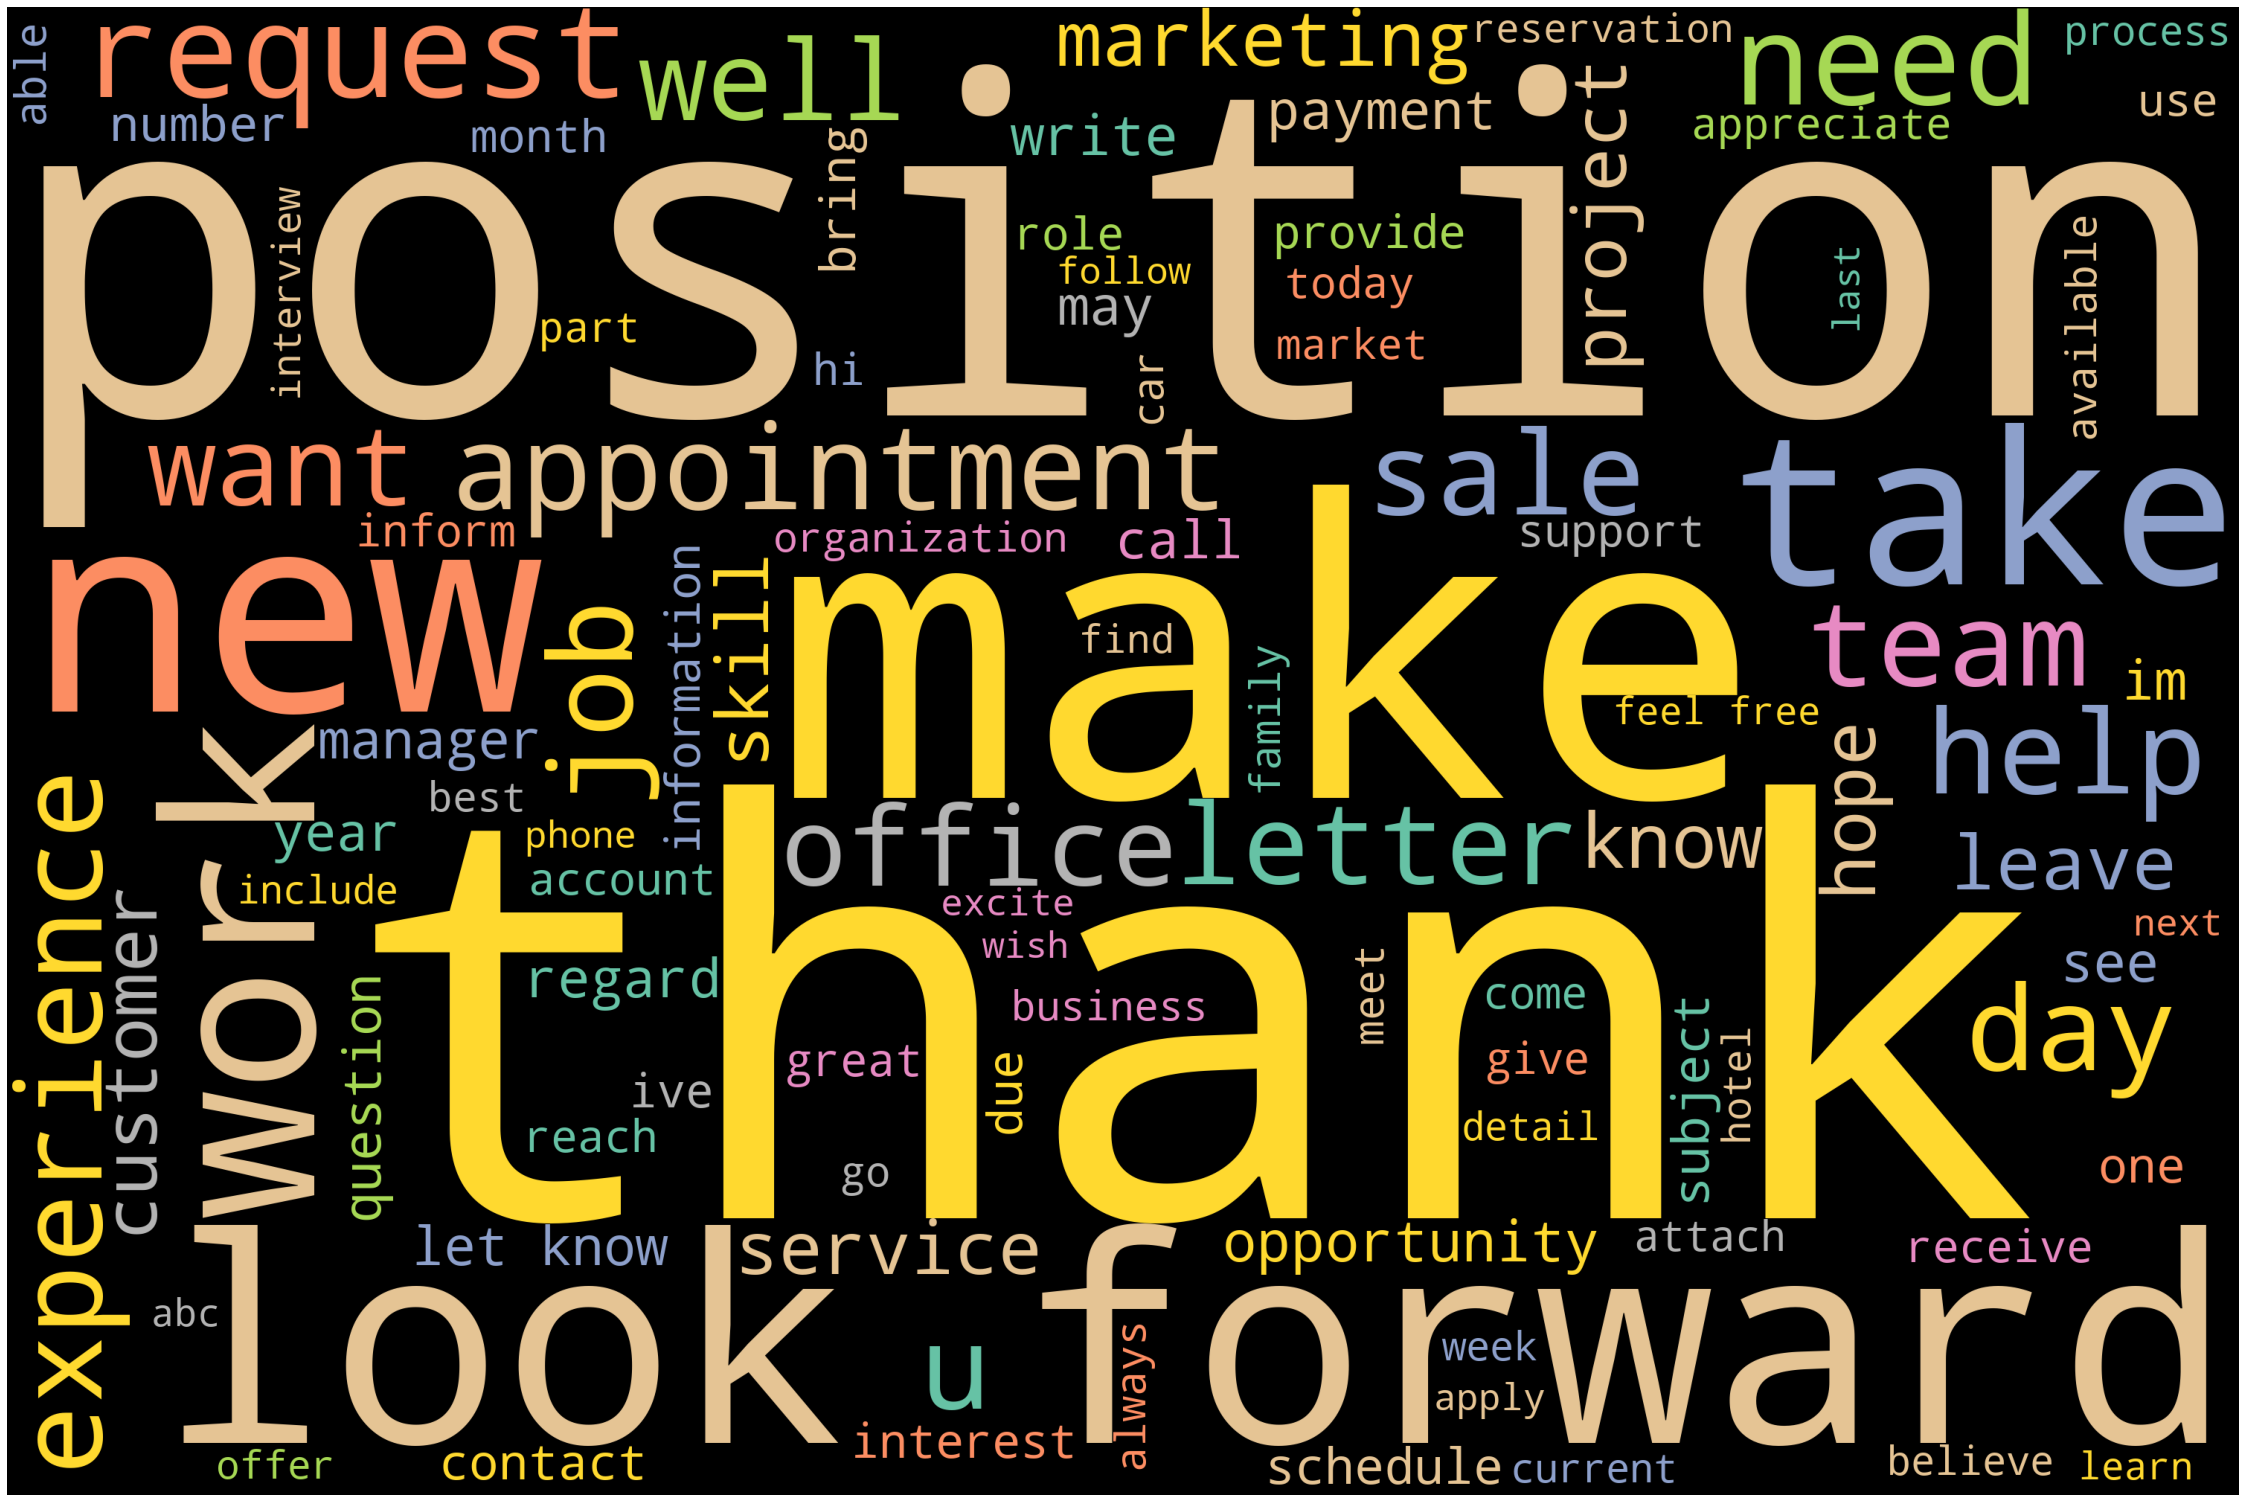

In [28]:
text = df['lemmatized_text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

## DEFINE A NEW DATADRAME

In [29]:
data = df[["lemmatized_text","EMAIL_TEMPLATES"]]
data

,lemmatized_text,EMAIL_TEMPLATES
0,absolute pleasure recommend sale manager posit...,EMAIL RECOMMENDATION LETTER ...
1,professor student business market fall semeste...,EMAIL RECOMMENDATION LETTER ...
2,im reach request letter recommendation regard ...,EMAIL RECOMMENDATION LETTER ...
3,volunteered san francisco aspca elk dr supervi...,EMAIL RECOMMENDATION LETTER ...
4,write request provide reference begin job sear...,EMAIL RECOMMENDATION LETTER ...
...,...,...
313,hotel reservation letter sample november hotel...,Hotel Booking Confirmation ...
314,public chicago look forward see mr mcguire tha...,Hotel Booking Confirmation ...
315,wwwsetupmyhotelcom hotel address f e adminsetu...,Hotel Booking Confirmation ...
316,hotel riu costa lago inclusive torremolinos ma...,Hotel Booking Confirmation ...


# NAMED ENTITY RECOGNITION

In [30]:
import spacy
nlp = spacy.load('en')
text_nlp = nlp(no_punc_text)

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [ ]:
# print named entities in article
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
from spacy import displacy

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True)

In [ ]:
named_entities = []
temp_entity_name = ''
temp_named_entity = None
for term, tag in ner_tagged:
    if tag:
        temp_entity_name = ' '.join([temp_entity_name, term]).strip()
        temp_named_entity = (temp_entity_name, tag)
    else:
        if temp_named_entity:
            named_entities.append(temp_named_entity)
            temp_entity_name = ''
            temp_named_entity = None

In [ ]:
print(named_entities)

In [ ]:
from collections import Counter
c = Counter([item[1] for item in named_entities])
c.most_common()

In [ ]:
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams["figure.autolayout"] = True
plt.bar(c.keys(), c.values())

plt.show()

### PART OF SPEECH TAGGING

In [ ]:
for token in text_nlp:
    print(token, token.pos_)

In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text_nlp if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(text_tokens)
pd.DataFrame(pos_tags).T

In [ ]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [ ]:
df

##  BIGRAM ANALYSIS

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(df['lemmatized_text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

### BIGRAM VISUALIZATION

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

## TRIGRAM ANALYSIS

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(df['lemmatized_text'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

## TRIGRAM VISUALIZATION

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# MODEL BUILDING

### Label the output

In [ ]:
data['category_id'] = data['EMAIL_TEMPLATES'].factorize()[0]
from io import StringIO
category_id_df = data[['EMAIL_TEMPLATES', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'EMAIL_TEMPLATES']].values)

## VISUALIZATION OF NUMBER OF MAILS FOR EACH TEMPLATE

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('EMAIL_TEMPLATES').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

## TF-IDF

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data.lemmatized_text).toarray()
labels = data.category_id
features.shape

## PERFORMING AND VISUALIZE NGRAM ANALYSIS ON EACH TEMPLATE

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for EMAIL_TEMPLATES, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(EMAIL_TEMPLATES))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

## SPLIT THE DATA INTO TRAIN AND TEST 

###  FIT WITH CountVectorizer and TfidfTransformer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_text'], data['EMAIL_TEMPLATES'],test_size=0.3, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train_tfidf.shape

In [ ]:
X_test_tfidf.shape

# USING MULTIPLE MODEL TO FIND WHICH IS BEST

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [ ]:
x = data['lemmatized_text']
y = data['EMAIL_TEMPLATES']
vect = CountVectorizer()


In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.05,random_state=42)
x_train_dtm = vect.fit_transform(x_train1)
x_test_dtm = vect.transform(x_test1)

## NAIVE BAYES

In [ ]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

## SGDClassifier

In [ ]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

## RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

## LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(x_train_dtm,y_train1)
lg_predict = lg.predict(x_test_dtm)
Logi_acc = metrics.accuracy_score(y_test1,lg_predict)
Logi_acc

## XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

## PassiveAggressiveClassifier

In [ ]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

## LinearSVC

In [ ]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

In [ ]:
data = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,Logi_acc,xg_acc,pg_acc,lv_acc]}

## ACCURACY SCORE OF EACH MODEL

In [ ]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=data_model)
sns.stripplot(x='Model', y='Accuracy', data=data_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()

In [ ]:
data_model.plot(x="Model", y="Accuracy", kind="bar")

## FROM ACCURACY SCORE PassiveAggressiveClassifier IS SHOWING MAXIMUM ACCURACY.                        

## LETS WE FINALIZE THE MODEL USING PassiveAggressiveClassifier

In [ ]:
from sklearn.model_selection import train_test_split

model = PassiveAggressiveClassifier()


In [ ]:
X_COUNT = count_vect.fit_transform(x_train1)
X_TFIDF = tfidf_transformer.fit_transform(X_COUNT)

In [ ]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, y_train1)

## SAMPLE PREDICTION OF FINAL MODEL

In [ ]:
print(modelf.predict(count_vect.transform(["sick leave"])))

In [ ]:
print(modelf.predict(count_vect.transform(["appointment schedule"])))

In [ ]:
texts = ["I requested a home loan modification",
         "regular monthly payment",
         "relieve",
         "hi guys",
         "marriage",
         "annual"]
text_features = tfidf.transform(texts)
model.fit(features, labels)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

# SAVE THE MODEL IN PICKLE FILE 

In [ ]:
import pickle

In [ ]:
    # Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

    # Save the model
mod_file = 'classification.model'
pickle.dump(modelf, open(mod_file, 'wb'))

# Conclusion
## - Our email template worked well with LinearSVC model.